In [14]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"joashmuganda","key":"fe44241e666f2c0f483b9b4ba3bd7eb7"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [4]:
!kaggle datasets download -d joachipo/darksound

100% 3.64G/3.65G [00:38<00:00, 58.0MB/s]
100% 3.65G/3.65G [00:38<00:00, 101MB/s] 


In [5]:
!unzip darksound.zip

Streaming output truncated to the last 5000 lines.
  inflating: darksound/train/Strigidae/Megascops koepckeae_Koepckes Screech Owl/megkoe_25.wav  
  inflating: darksound/train/Strigidae/Megascops koepckeae_Koepckes Screech Owl/megkoe_26.wav  
  inflating: darksound/train/Strigidae/Megascops koepckeae_Koepckes Screech Owl/megkoe_27.wav  
  inflating: darksound/train/Strigidae/Megascops koepckeae_Koepckes Screech Owl/megkoe_28.wav  
  inflating: darksound/train/Strigidae/Megascops koepckeae_Koepckes Screech Owl/megkoe_29.wav  
  inflating: darksound/train/Strigidae/Megascops koepckeae_Koepckes Screech Owl/megkoe_3.wav  
  inflating: darksound/train/Strigidae/Megascops koepckeae_Koepckes Screech Owl/megkoe_30.wav  
  inflating: darksound/train/Strigidae/Megascops koepckeae_Koepckes Screech Owl/megkoe_31.wav  
  inflating: darksound/train/Strigidae/Megascops koepckeae_Koepckes Screech Owl/megkoe_32.wav  
  inflating: darksound/train/Strigidae/Megascops koepckeae_Koepckes Screech Owl/megkoe

# **Feature Extraction**

In [6]:
!pip install --upgrade librosa


In [7]:
!pip install librosa soundfile numpy


In [8]:
import os
import librosa
import numpy as np

def extract_mfcc(file_path):
    try:
        audio, sample_rate = librosa.load(file_path, sr=None)
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccs_processed = np.mean(mfccs.T, axis=0)
    except Exception as e:
        print(f"Error encountered while parsing file: {file_path}")
        return None
    return mfccs_processed

# Path to your dataset
dataset_path = '/content/darksound/train'

# Extract MFCCs for each audio file
features = []
for folder in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder)
    for sub_folder in os.listdir(folder_path):
        sub_folder_path = os.path.join(folder_path, sub_folder)
        for file in os.listdir(sub_folder_path):
            file_path = os.path.join(sub_folder_path, file)
            mfccs = extract_mfcc(file_path)
            if mfccs is not None:
                features.append(mfccs)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

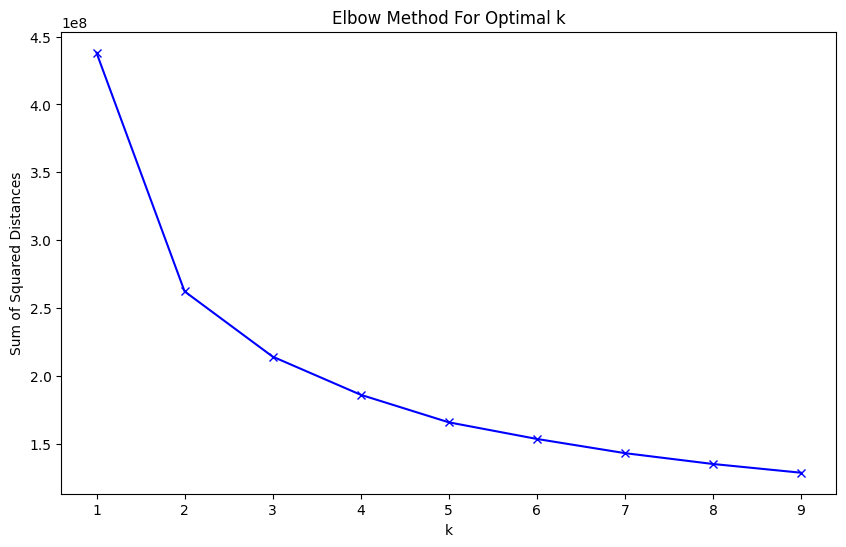

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the Sum of Squared Distances for a range of k values
ssd = []
K = range(1, 10)  # Adjust this range based on your dataset size and diversity
for k in K:
    km = KMeans(n_clusters=k, random_state=22)
    km = km.fit(features)
    ssd.append(km.inertia_)

# Plot the SSD for each k
plt.figure(figsize=(10, 6))
plt.plot(K, ssd, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.show()



the "elbow" appears to be at = 4
k=4, where the decrease in WCSS starts to level off. Therefore, K= 4 k=4 might be a good choice for the number of clusters.

In [10]:
from sklearn.cluster import KMeans


k = 4

# Perform K-Means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(features)

# Get the cluster labels (which cluster each sample belongs to)
cluster_labels = kmeans.labels_


audio_paths = [os.path.join(dataset_path, folder, sub_folder, file)
               for folder in os.listdir(dataset_path)
               for sub_folder in os.listdir(os.path.join(dataset_path, folder))
               for file in os.listdir(os.path.join(dataset_path, folder, sub_folder))]

audio_cluster_map = list(zip(audio_paths, cluster_labels))




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [11]:
# Print the cluster label for each audio file
for path, label in audio_cluster_map:
    print(f"File: {path} - Cluster: {label}")


Streaming output truncated to the last 5000 lines.
File: /content/darksound/train/Trogonidae/Trogon melanurus_Black-tailed Trogon/tromel_3.wav - Cluster: 3
File: /content/darksound/train/Trogonidae/Trogon melanurus_Black-tailed Trogon/tromel_12.wav - Cluster: 0
File: /content/darksound/train/Trogonidae/Trogon melanurus_Black-tailed Trogon/tromel_20.wav - Cluster: 0
File: /content/darksound/train/Trogonidae/Trogon melanurus_Black-tailed Trogon/tromel_49.wav - Cluster: 0
File: /content/darksound/train/Trogonidae/Trogon melanurus_Black-tailed Trogon/tromel_19.wav - Cluster: 0
File: /content/darksound/train/Trogonidae/Trogon melanurus_Black-tailed Trogon/tromel_24.wav - Cluster: 0
File: /content/darksound/train/Trogonidae/Trogon melanurus_Black-tailed Trogon/tromel_17.wav - Cluster: 3
File: /content/darksound/train/Trogonidae/Trogon melanurus_Black-tailed Trogon/tromel_43.wav - Cluster: 0
File: /content/darksound/train/Trogonidae/Trogon melanurus_Black-tailed Trogon/tromel_28.wav - Cluster

## **Visualizing and Analysis**

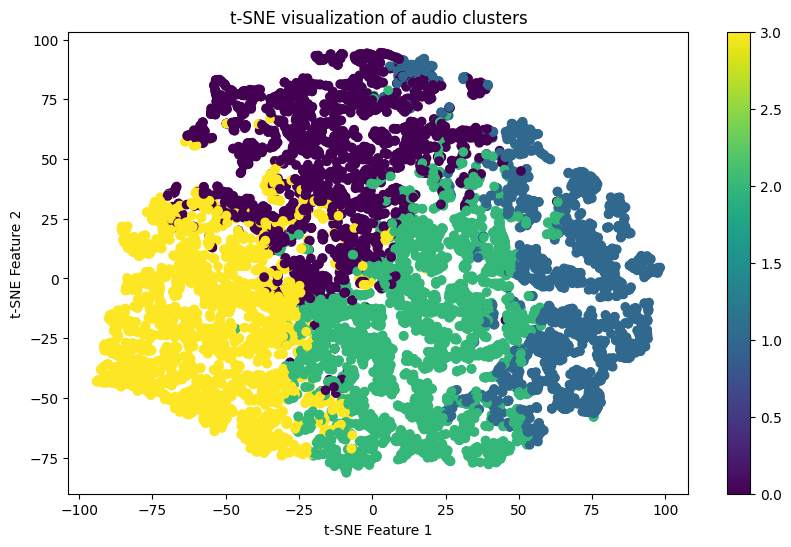

In [13]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Convert features to a NumPy array
features_array = np.array(features)

# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
reduced_features = tsne.fit_transform(features_array)

# Plot the clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=cluster_labels, cmap='viridis')
plt.colorbar(scatter)
plt.title('t-SNE visualization of audio clusters')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.show()


Yellow spots represent one cluster of audio files that share similar features.
Dark purple spots are another cluster, indicating a different group of audio files that are similar to each other but different from the yellow cluster.
Green spots indicate a third cluster with its unique characteristics.
Blue spots show a fourth cluster, again indicating similarity within that group but differences when compared to the other clusters.

In [14]:
# Given 'audio_cluster_map' is a list of tuples containing (file_path, cluster_label)

from collections import defaultdict

# Create a dictionary to hold file paths for each cluster
cluster_dict = defaultdict(list)

# Populate the dictionary with file paths grouped by cluster label
for file_path, cluster_label in audio_cluster_map:
    cluster_dict[cluster_label].append(file_path)

# Print out a summary for each cluster
for cluster_label, file_paths in cluster_dict.items():
    print(f"Cluster {cluster_label}:")
    print(f"Number of Files: {len(file_paths)}")

    # Print out up to 5 sample file paths for this cluster
    print("Sample Files:")
    for path in file_paths[:5]:
        print(f" - {path}")

    # Additional analysis could go here to determine common characteristics

    print("")  # Add an empty line for readability between clusters


Cluster 3:
Number of Files: 3250
Sample Files:
 - /content/darksound/train/Thraupidae/Sericossypha albocristata_White-capped Tanager/seralb_41.wav
 - /content/darksound/train/Thraupidae/Sericossypha albocristata_White-capped Tanager/seralb_30.wav
 - /content/darksound/train/Thraupidae/Sericossypha albocristata_White-capped Tanager/seralb_14.wav
 - /content/darksound/train/Thraupidae/Sericossypha albocristata_White-capped Tanager/seralb_19.wav
 - /content/darksound/train/Thraupidae/Sericossypha albocristata_White-capped Tanager/seralb_29.wav

Cluster 0:
Number of Files: 3060
Sample Files:
 - /content/darksound/train/Thraupidae/Sericossypha albocristata_White-capped Tanager/seralb_15.wav
 - /content/darksound/train/Thraupidae/Sericossypha albocristata_White-capped Tanager/seralb_17.wav
 - /content/darksound/train/Thraupidae/Sericossypha albocristata_White-capped Tanager/seralb_18.wav
 - /content/darksound/train/Thraupidae/Sericossypha albocristata_White-capped Tanager/seralb_25.wav
 - /c

audio files have been grouped into four clusters based on their MFCC features. Cluster 3, with 3250 files, and Cluster 2, with 3642 files, appear to be the largest groups, possibly indicating common audio characteristics shared among a larger set of files. Cluster 0 and Cluster 1 have 3060 and 2498 files, respectively.